<a href="https://colab.research.google.com/github/meduardajustino/on34-python-s07-banco-de-dados-I/blob/main/Exerc%C3%ADcio_de_casa_Maria_Eduarda_Justino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ON34 Python S07 Banco de dados I - Exercicio de casa

Esse documento tem como objetivo passar passo a passo de um exercício que deverá ser feito após de Bando de dados I.

## Caso pessoal

Pense no seu dia a dia, o que poderia se aproveitar de uma arquitetura de banco de dados para organizar as informações? (e as idéias).



## Desafio 1

Traga um caso de uso que identificou em seu dia a dia. Explique o motivo dos dados precisarem de organização e quais as informações que espera ter uma vez que esses forem organizados.

Resposta esperada: Um texto de no minimo 2 parágrafos com sua necessidade de negócio e ao menos 3 perguntas a serem respondidas pela organização dos dados.



##Resposta:
Meu dia a dia como universitária é repleto de responsabilidades relacionadas a atividades e trabalhos. Muitas vezes me perco com as datas e como dividir o que foi entregue, o que foi feito e não precisa ser, o que devo estudar. Enfim, muitas coisas, por ser perfeccionista ter um "TO DO" ou agenda planejadora não é o suficiente.

Perguntas a serem respondidas:
- Quais atividades não foram feitas hoje? ❎
- Quais atividades foram enviadas hoje? ✅
- Quais matérias estão pendentes? ⌚


## Desafio 2

Estruture uma arquitetura de ao menos 3 entidades contando com chaves primárias e estrangeiras para solucionar o problema inicial.

Resposta esperada: Um desenho de tabelas e suas relações, indicação de qual modelo de estrutura escolheu.

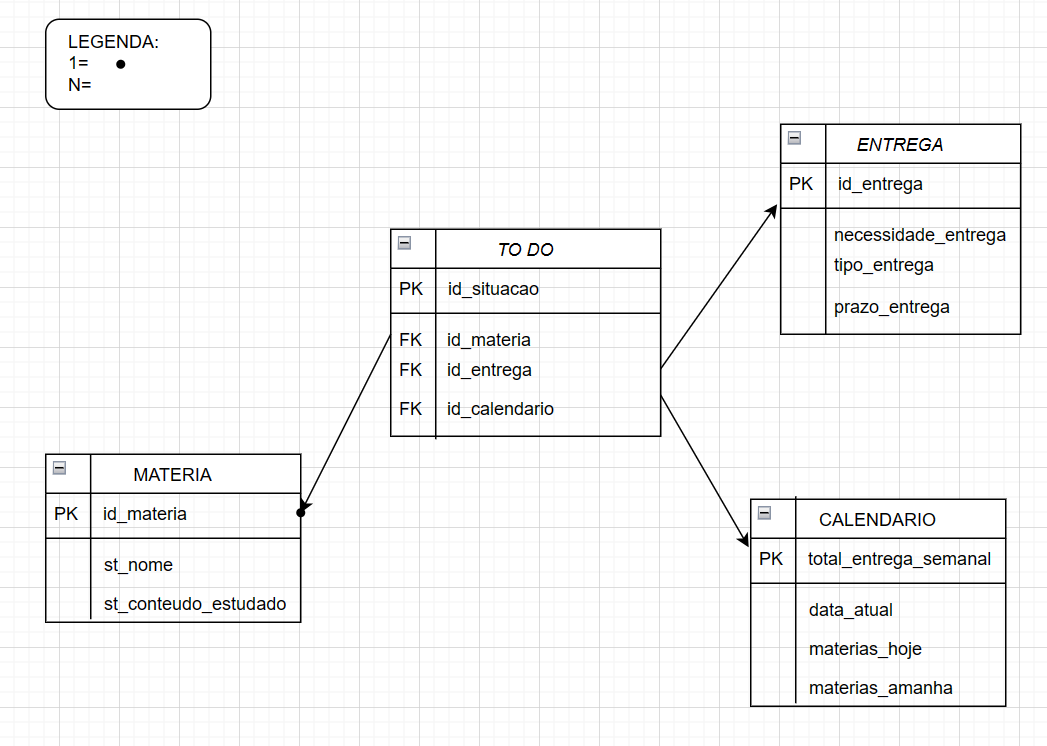

## Desafio 3

Crie toda a estrutura desenhada e popule as tabelas citadas.

Resposta esperada: Respostas de acordo com o desenho e o preenchimento feito.


In [42]:
import sqlite3

conn = sqlite3.connect("TODO4.db")

cur  = conn.cursor()

In [43]:
# Criando a tabela ENTREGA
cur.execute("""
CREATE TABLE ENTREGA(
  id_entrega DATE PRIMARY KEY,
  necessidade_entrega TEXT NOT NULL,
  tipo_entrega TEXT NOT NULL,
  prazo_entrega DATE
)
""")

# Criando a tabela MATERIA
cur.execute("""
CREATE TABLE MATERIA(
  id_materia TEXT PRIMARY KEY,
  st_nome TEXT NOT NULL,
  st_conteudo_estudado TEXT NOT NULL
)
""")

# Criando a tabela CALENDARIO
cur.execute("""
CREATE TABLE CALENDARIO(
  total_entrega_semanal REAL NOT NULL PRIMARY KEY,
  data_atual DATE NOT NULL,
  materias_hoje TEXT NOT NULL,
  materias_amanha TEXT NOT NULL
)
""")

In [44]:
#Criando a tabela de TODO

cur.execute("""
CREATE TABLE TODO4(
  id_situacao TEXT NOT NULL PRIMARY KEY,
  id_materia TEXT NOT NULL,
  id_entrega DATE NOT NULL,
  total_entrega_semanal REAL NOT NULL,
  FOREIGN KEY (id_materia)
      REFERENCES MATERIA (id_materia)
         ON DELETE CASCADE
         ON UPDATE NO ACTION,
  FOREIGN KEY (id_entrega)
      REFERENCES ENTEGRA (id_entrega)
         ON DELETE CASCADE
         ON UPDATE NO ACTION,
  FOREIGN KEY (total_entrega_semanal)
      REFERENCES CALENDARIO (data_atual)
         ON DELETE CASCADE
         ON UPDATE NO ACTION
)
""")

In [45]:
#MATERIA
cur.execute("""
INSERT INTO MATERIA
VALUES
("T1", 'Microeconomia 1', 'Maximização do lucro'),
("T2", 'Elementos de Economia Matemática 2', 'Matriz'),
("T3", 'Laboratório de Matemática', 'Linguagem R'),
("T4", 'Intro à Estatística Econômica', 'Probabilidade'),
("T5", 'Contabilidade Social', 'Matriz Insumo Produto de PE');
""")

In [46]:
conn.commit()

In [47]:
#CALENDARIO
cur.execute("""
INSERT INTO CALENDARIO
VALUES
(1, CURRENT_DATE, 'Microeconomia e Elementos 2', 'Estatística'),
(2, CURRENT_DATE, 'Laboratório, Microeconomia e Contabilidade', 'Elementos 2'),
(3, CURRENT_DATE, 'Contabilidade', 'Estatística  e Elementos 2');
""")

In [29]:
conn.commit()

In [31]:
#ENTREGA
cur.execute("""
INSERT INTO ENTREGA
VALUES
('E1', 'SIM', 'Trabalho', 07/08/2024),
('E2', 'SIM', 'Relatorio', 09/10/2024),
('E3', 'NAO', 'Lista', NULL),
('E4', 'SIM', 'Seminário', 01/08/2024);
""")

In [32]:
conn.commit()

In [52]:
# Inserindo dados na id_situacao
cur.execute("""
INSERT INTO TODO4 (id_situacao, id_materia, id_entrega, total_entrega_semanal)
VALUES
("Pendente", "T1", "E1", 3),
("Adiado", "T2", "E2", 3),
("Concluido", "T3", "E3", 2),
("Concluido", "T4", "E2", 2),
("Pendente", "T5", "E4", 1)
ON CONFLICT(id_situacao) DO NOTHING;
""")


In [50]:
conn.commit()

## Desafio 4

Se deixe errar e corrigir. Mostre ajustes que teve que fazer depois da estrutura completa.

Resposta esperada: Use o metodo UPDATE, DROP ou ALTER para modificar sua estrutura.


In [65]:
cur.execute("""
UPDATE MATERIA
SET st_nome = 'Introdução à Estatística Econômica'
WHERE st_nome = 'Intro à Estatística Econômica'
""")

In [63]:
 cur.execute("""
    ALTER TABLE ENTREGA
    ADD COLUMN status_conclusao TEXT DEFAULT 'Pendente'
    """)

In [64]:
cur.execute("""
UPDATE ENTREGA
SET status_conclusao = CASE
    WHEN id_entrega IN (SELECT id_entrega FROM TODO4 WHERE id_situacao = 'Concluido') THEN 'Concluido'
    ELSE 'Pendente'
END
""")


In [54]:
cur.execute("""
ALTER TABLE TODO4 ADD COLUMN data_atual DATE;
""")

In [55]:
cur.execute("""
UPDATE TODO4
SET data_atual = CURRENT_DATE
WHERE id_situacao IN ('Pendente', 'Adiado', 'Concluido')
""")


## Desafio 5

Responda suas dúvidas de negócio com os dados que levantou.

Resposta esperada: Crie consultas para entender melhor seus dados, ao menos 3 consultas relacionadas as dúvidas iniciais.


In [57]:
# Quais atividades não foram feitas hoje?
cur.execute("""
SELECT id_materia, id_entrega
FROM TODO4
WHERE id_situacao != 'Concluido'
AND data_atual = CURRENT_DATE
""")
atividades_nao_feitas_hoje = cur.fetchall()

In [58]:
# Quais atividades foram enviadas hoje?
cur.execute("""
SELECT id_materia, id_entrega
FROM TODO4
WHERE id_situacao = 'Concluido'
AND data_atual = CURRENT_DATE
""")
atividades_enviadas_hoje = cur.fetchall()

In [61]:
# Quais matérias estão pendentes?
cur.execute("""
SELECT DISTINCT MATERIA.st_nome
FROM MATERIA
JOIN TODO4 ON MATERIA.id_materia = TODO4.id_materia
WHERE TODO4.id_situacao = 'Pendente'
""")
materias_pendentes = cur.fetchall()


In [66]:
conn.close()

In [67]:
print("Atividades não feitas hoje:", atividades_nao_feitas_hoje)
print("Atividades enviadas hoje:", atividades_enviadas_hoje)
print("Matérias pendnetes:", materias_pendentes)

Atividades não feitas hoje: [('T1', 'E1'), ('T2', 'E2')]
Atividades enviadas hoje: [('T3', 'E3')]
Matérias pendnetes: [('Microeconomia 1',)]
